# EXPLORING POOR COUNTRIES INDEX BY WORLD BANK

## Install world bank API

In [2]:
#!pip install wbdata

## Imports

In [82]:
import wbdata as wbd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import iso3166 as iso3166

## Functions

In [125]:
def categorize_poverty(earning_per_day):
    if earning_per_day <= 2.15:
        return 'Poor'
    elif 2.15 < earning_per_day <= 6.85:  # Correct comparison
        return 'Upper-Middle'
    elif earning_per_day > 6.85:
        return 'Rich'
    else:
        return 'N/A'

def is_country(country_name):
    if country_name.lower() in iso3166.countries:
        return 'yes'
    else:
        return 'no'

## Basic assumptions

[According to World Bank](https://www.worldbank.org/en/topic/measuringpoverty) "The international extreme poverty line is set at 2.15 USD per person per day using 2017 prices. This means that anyone living on less than 2.15 USD a day is in extreme poverty."

In [132]:
# Set up the indicator for poverty 
poverty_indicator = "SI.POV.DDAY"
df = wbd.get_dataframe(indicators={poverty_indicator: "Poverty Index"}, keep_levels=True)

In [164]:
poverty_df = df[df.index.get_level_values(1) == '2018']
poverty_df = poverty_df.dropna(subset=['Poverty Index'])
poverty_df = poverty_df.reset_index()
poverty_df.rename(columns={'Poverty Index': 'poverty_index'}, inplace=True)
poverty_df['wealth_category'] = poverty_df['poverty_index'].apply(categorize_poverty)
poverty_df['is_country'] = poverty_df['country'].apply(is_country)
poverty_df = poverty_df.loc[(poverty_df['is_country'] == 'yes') & (poverty_df['wealth_category']=='Poor')]

In [165]:

poverty_df.head()

,country,date,poverty_index,wealth_category,is_country
13,Albania,2018,0.0,Poor,yes
15,Argentina,2018,1.0,Poor,yes
16,Armenia,2018,1.3,Poor,yes
17,Australia,2018,0.5,Poor,yes
18,Austria,2018,0.6,Poor,yes


In [167]:
len(poverty_df)

53

In [168]:
300 // len(poverty_df)

5

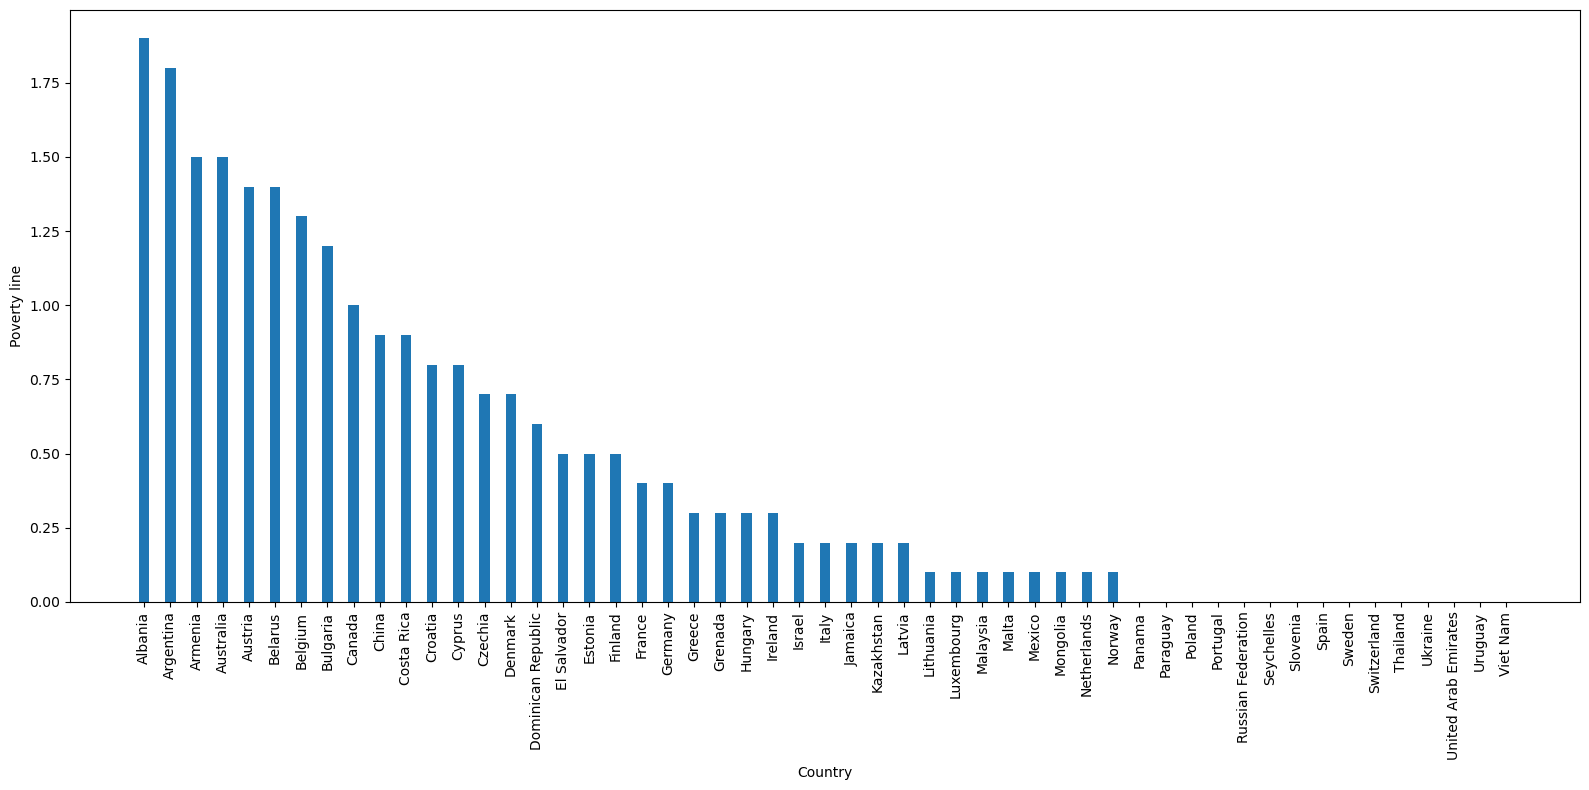

In [166]:
poor_countries_df = df1.loc[df1['Poverty Index'] <= 2.15]
fig, ax= plt.subplots(figsize=(16,8))

ax.bar(poverty_df['country'],
       poverty_df['poverty_index'].sort_values(ascending=False),width=.4)
ax.set_xlabel('Country')
ax.set_ylabel('Poverty line')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
